In [1]:
import matplotlib.pyplot as plt
import numpy as np
import polars as pl
import seaborn as sns
from tqdm import tqdm

from compstat_research.config import MPLSTYLE_DIR, PROCESSED_DATA_DIR

plt.style.use(MPLSTYLE_DIR / "iragca_cmr10.mplstyle")

2025-02-21 10:14:21.985 | INFO     | compstat_research.config:<module>:11 - PROJ_ROOT path is: D:\Documents\3 Production Save Files\1 Cloned repositories\compstat-research


In [2]:
data_dir = PROCESSED_DATA_DIR / "cds" / "era5" / "2m-temperature" / "global"

daily_temp = pl.read_parquet(data_dir / "era5-2m-temperature-global-daily-avg.parquet")
yearly_temp = pl.read_parquet(data_dir / "era5-2m-temperature-global-yearly-avg.parquet")
daily_temp.head()

temp_year,temp_month,temp_day,avg_temp
i64,i64,i64,f64
1940,1,2,276.007051
1940,1,3,275.975732
1940,1,4,275.934177
1940,1,5,275.893011
1940,1,6,275.7141


## Looking at seasonal data

Text(0.5, 1.0, '1940 - 2025')

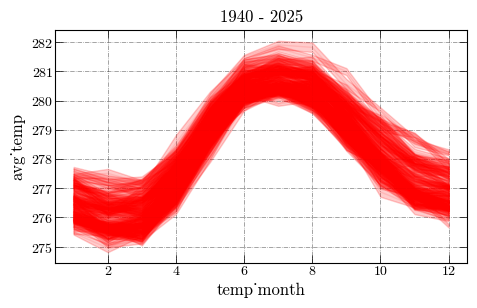

In [3]:
START_YEAR = 1940
END_YEAR = START_YEAR + 85
for year in range(START_YEAR, END_YEAR):
    sns.lineplot(
        data=daily_temp.filter(pl.col("temp_year") == year), 
        x='temp_month', 
        y='avg_temp',
        alpha=0.1,
        color='red',
        label="_nolegend_"
    )
plt.title(f"{START_YEAR} - {END_YEAR}")

Text(0.5, 1.0, '1980 - 2025')

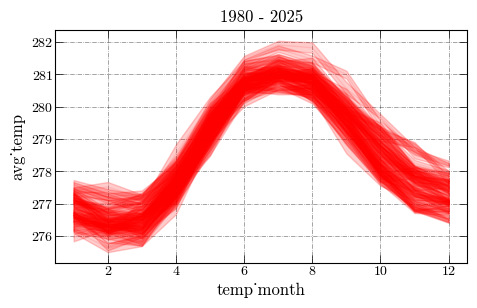

In [4]:
START_YEAR = 1980
END_YEAR = START_YEAR + 45
for year in range(START_YEAR, END_YEAR):
    sns.lineplot(
        data=daily_temp.filter(pl.col("temp_year") == year), 
        x='temp_month', 
        y='avg_temp',
        alpha=0.1,
        color='red',
        label="_nolegend_"
    )
plt.title(f"{START_YEAR} - {END_YEAR}")

Text(0.5, 1.0, '1940 - 1985')

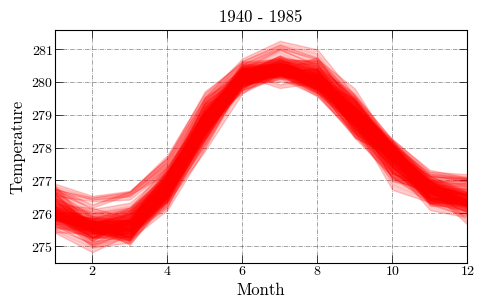

In [5]:
START_YEAR = 1940
END_YEAR = START_YEAR + 45
for year in range(START_YEAR, END_YEAR):
    sns.lineplot(
        data=daily_temp.filter(pl.col("temp_year") == year), 
        x='temp_month', 
        y='avg_temp',
        alpha=0.1,
        color='red',
        label="_nolegend_"
    )
plt.xlim(1, 12)
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.title(f"{START_YEAR} - {END_YEAR}")

## Simulate the yearly averages by using the distribution of each year.

In [6]:
sims = np.zeros((1000, 85))
for iteration in tqdm(sims, unit="iteration"):
    for year in range(85):
        iteration[year] = np.random.choice(daily_temp.filter(pl.col("temp_year") == year + 1940)["avg_temp"], size=365).mean()

100%|██████████| 1000/1000 [00:19<00:00, 50.97iteration/s]


100%|██████████| 1000/1000 [00:16<00:00, 59.97plot/s]


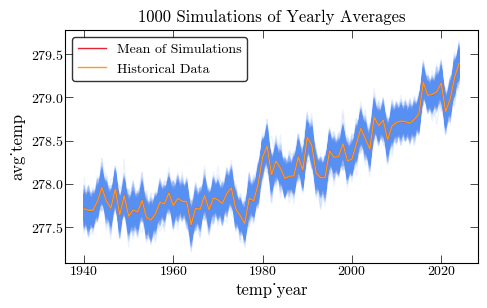

In [7]:
for sim in tqdm(sims, unit='plot'):
    sns.lineplot(x=np.arange(1940, 1940 + 85), y=sim, alpha=0.1, color='#5790fc', label="_nolegend_")

# plot the mean of the simulations
sns.lineplot(x=np.arange(1940, 1940 + 85), y=sims.mean(axis=0), color='#e42536', label="Mean of Simulations")

# plot the historical data
sns.lineplot(data=daily_temp, x='temp_year', y='avg_temp', color='#f89c20', label="Historical Data")

plt.title("1000 Simulations of Yearly Averages")
plt.grid()
plt.legend()
plt.show()

## Simulate by using the current and previous distributions

In [8]:
sims = np.zeros((1000, 85))
for iteration in tqdm(sims, unit="iteration"):
    for year in range(85):
        iteration[year] = np.random.choice(daily_temp.filter(pl.col("temp_year") <= year + 1941)["avg_temp"], size=365).mean()

100%|██████████| 1000/1000 [00:18<00:00, 53.37iteration/s]


100%|██████████| 1000/1000 [00:16<00:00, 59.66plot/s]


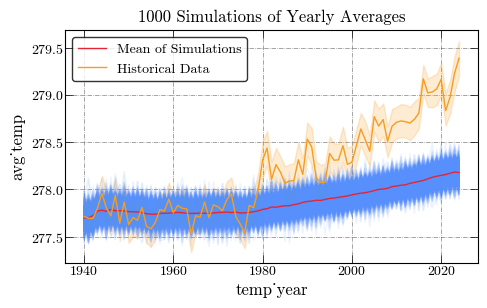

In [9]:
for sim in tqdm(sims, unit='plot'):
    sns.lineplot(x=np.arange(1940, 1940 + 85), y=sim, alpha=0.1, color='#5790fc', label="_nolegend_")

# plot the mean of the simulations
sns.lineplot(x=np.arange(1940, 1940 + 85), y=sims.mean(axis=0), color='#e42536', label="Mean of Simulations")

# plot the historical data
sns.lineplot(data=daily_temp, x='temp_year', y='avg_temp', color='#f89c20', label="Historical Data")

plt.title("1000 Simulations of Yearly Averages")
plt.legend()
plt.show()

## Simulate using current years distribution and last 5 years

In [10]:
sims = np.zeros((1000, 85))
for iteration in tqdm(sims, unit="iteration"):
    for year in range(85):
        iteration[year] = np.random.choice(
            daily_temp.filter(
                (year + 1941 - 5 <= pl.col("temp_year")) & (pl.col("temp_year") <= year + 1941)
            )["avg_temp"],
            size=365,
        ).mean()

100%|██████████| 1000/1000 [00:20<00:00, 47.83iteration/s]


100%|██████████| 1000/1000 [00:16<00:00, 61.76plot/s]


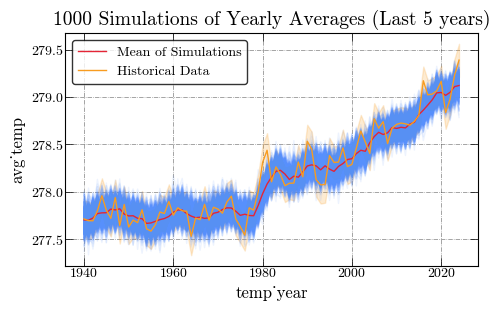

In [11]:
for sim in tqdm(sims, unit='plot'):
    sns.lineplot(x=np.arange(1940, 1940 + 85), y=sim, alpha=0.1, color='#5790fc', label="_nolegend_")

# plot the mean of the simulations
sns.lineplot(x=np.arange(1940, 1940 + 85), y=sims.mean(axis=0), color='#e42536', label="Mean of Simulations")

# plot the historical data
sns.lineplot(data=daily_temp, x='temp_year', y='avg_temp', color='#f89c20', label="Historical Data")

plt.title("1000 Simulations of Yearly Averages (Last 5 years)", size=14)
plt.legend()
plt.show()

## Simulate using only the previous 5 years

100%|██████████| 1000/1000 [00:17<00:00, 57.82plot/s]


<Axes: xlabel='temp_year', ylabel='avg_temp'>

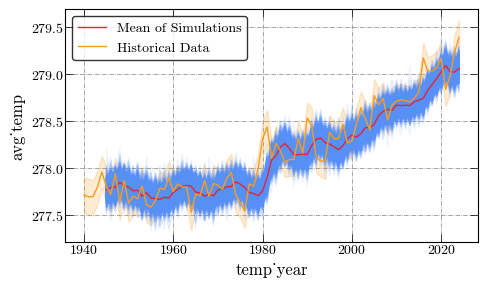

In [12]:
START_YEAR = 1945  # Starting from 1945 to ensure we have 5 years of historical data
sims = np.zeros((1000, 80))  # Adjusted to 80 years (1945-2024)
for iteration in tqdm(sims, unit="iteration"):
    for year in range(80):
        current_year = START_YEAR + year
        iteration[year] = np.random.choice(
            daily_temp.filter(
                (current_year - 5 <= pl.col("temp_year")) & (pl.col("temp_year") < current_year)
            )["avg_temp"],
            size=365,
        ).mean()

# Update the plotting code
for sim in tqdm(sims, unit='plot'):
    sns.lineplot(x=np.arange(START_YEAR, START_YEAR + 80), y=sim, alpha=0.1, color='#5790fc', label="_nolegend_")

# plot the mean of the simulations
sns.lineplot(x=np.arange(START_YEAR, START_YEAR + 80), y=sims.mean(axis=0), color='#e42536', label="Mean of Simulations")

# plot the historical data
sns.lineplot(data=daily_temp, x='temp_year', y='avg_temp', color='#f89c20', label="Historical Data")

In [13]:
## Using using daily changes
daily_temp = daily_temp.with_columns(
    ((pl.col("avg_temp") - pl.col("avg_temp").shift(1)) / pl.col("avg_temp").shift(1)).alias("temp_change")
).drop_nulls()


In [14]:
daily_temp

temp_year,temp_month,temp_day,avg_temp,temp_change
i64,i64,i64,f64,f64
1940,1,3,275.975732,-0.000113
1940,1,4,275.934177,-0.000151
1940,1,5,275.893011,-0.000149
1940,1,6,275.7141,-0.000648
1940,1,7,275.673892,-0.000146
…,…,…,…,…
2024,12,27,278.369356,0.000195
2024,12,28,278.28687,-0.000296
2024,12,29,278.242523,-0.000159


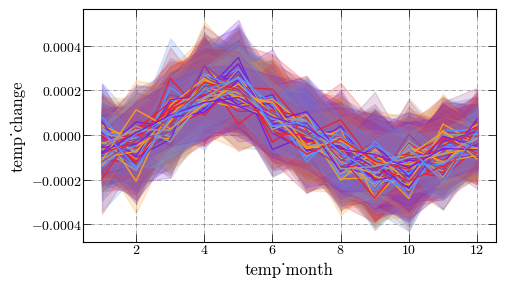

In [15]:
for year in range(1940, 2025):
    sns.lineplot(
        data=daily_temp.filter(pl.col("temp_year") == year),
        x="temp_month",
        y="temp_change",
    )


100%|██████████| 1000/1000 [00:16<00:00, 59.04plot/s]


Text(0.5, 1.0, '1000 Simulations of Yearly Averages (Daily Changes)')

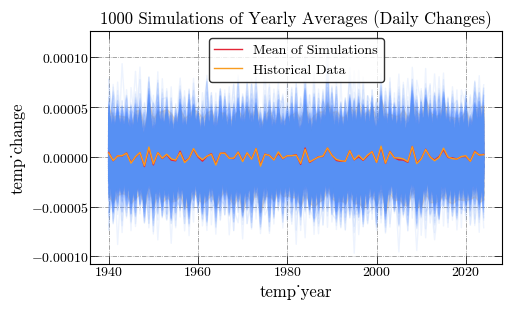

In [16]:
sims = np.zeros((1000, 85))
for iteration in tqdm(sims, unit="iteration"):
    for year in range(85):
        iteration[year] = np.random.choice(daily_temp.filter(pl.col("temp_year") == year + 1940)["temp_change"], size=365).mean()
for sim in tqdm(sims, unit='plot'):
    sns.lineplot(x=np.arange(1940, 1940 + 85), y=sim, alpha=0.1, color='#5790fc', label="_nolegend_")

# plot the mean of the simulations
sns.lineplot(x=np.arange(1940, 1940 + 85), y=sims.mean(axis=0), color='#e42536', label="Mean of Simulations")

# plot the historical data
sns.lineplot(data=daily_temp, x='temp_year', y='temp_change', color='#f89c20', label="Historical Data")

plt.title("1000 Simulations of Yearly Averages (Daily Changes)")


## Using daily changes (%)

100%|██████████| 1000/1000 [00:16<00:00, 60.88plot/s]


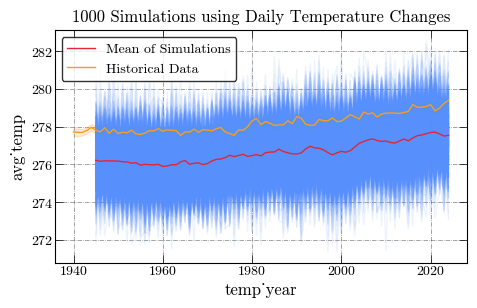

In [17]:
START_YEAR = 1945  # Starting from 1945 to ensure we have 5 years of historical data
sims = np.zeros((1000, 80))  # 1000 simulations, 80 years (1945-2024)

for iteration in tqdm(sims, unit="iteration"):
    for year in range(80):
        current_year = START_YEAR + year
        # Get initial temperature (average of first day of the year from previous 5 years)
        initial_temp = daily_temp.filter(
            (current_year - 5 <= pl.col("temp_year")) & 
            (pl.col("temp_year") < current_year) &
            (pl.col("temp_month") == 1) &
            (pl.col("temp_day") == 1)
        )["avg_temp"].mean()
        
        # Sample 365 daily changes from previous 5 years
        changes = np.random.choice(
            daily_temp.filter(
                (current_year - 5 <= pl.col("temp_year")) & 
                (pl.col("temp_year") < current_year)
            )["temp_change"],
            size=365
        )
        
        # Calculate the year's average temperature by applying daily changes
        temp = initial_temp
        yearly_temps = [temp]
        for change in changes:
            temp = temp * (1 + change)
            yearly_temps.append(temp)
        
        iteration[year] = np.mean(yearly_temps)

# Plotting
for sim in tqdm(sims, unit='plot'):
    sns.lineplot(x=np.arange(START_YEAR, START_YEAR + 80), y=sim, alpha=0.1, color='#5790fc', label="_nolegend_")

# plot the mean of the simulations
sns.lineplot(x=np.arange(START_YEAR, START_YEAR + 80), y=sims.mean(axis=0), color='#e42536', label="Mean of Simulations")

# plot the historical data
sns.lineplot(data=daily_temp, x='temp_year', y='avg_temp', color='#f89c20', label="Historical Data")

plt.title("1000 Simulations using Daily Temperature Changes")
plt.grid(True)
plt.legend()

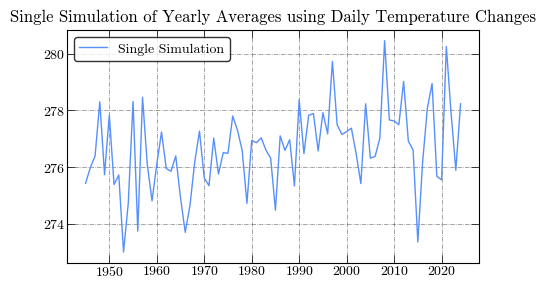

In [18]:
# single simulation
sns.lineplot(x=np.arange(1945, 2025), y=sims[0], color='#5790fc', label="Single Simulation")

plt.title("Single Simulation of Yearly Averages using Daily Temperature Changes")
plt.grid(True)
plt.legend()
plt.show()



## Random starting point

Plotting: 100%|██████████| 1000/1000 [00:16<00:00, 62.07plot/s]


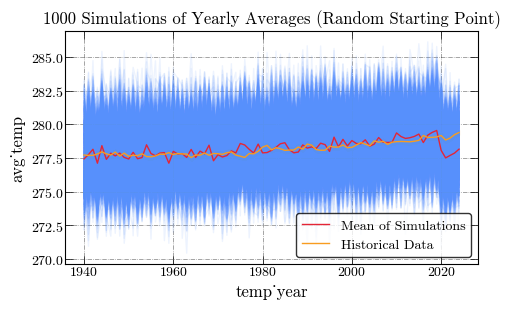

In [19]:
sims = np.zeros((1000, 85))
YEARS = np.arange(1940, 2025)
for iteration in tqdm(sims, unit="iteration", desc="Simulating"):
    for year in YEARS:
        starting_point = np.random.choice(daily_temp.filter(pl.col("temp_year") == year)["avg_temp"], size=1)

        day_changes = np.random.choice(daily_temp.filter(pl.col("temp_year") == year)["temp_change"], size=365)

        temp = starting_point
        yearly_temps = [temp]
        for change in day_changes:
            temp = temp * (1 + change)
            yearly_temps.append(temp)
        
        iteration[year - 1945] = np.mean(yearly_temps)

for sim in tqdm(sims, unit='plot', desc="Plotting"):
    sns.lineplot(x=YEARS, y=sim, alpha=0.1, color='#5790fc', label="_nolegend_")

#plot the mean of the simulations
sns.lineplot(x=YEARS, y=sims.mean(axis=0), color='#e42536', label="Mean of Simulations")

#plot the historical data
sns.lineplot(data=daily_temp, x='temp_year', y='avg_temp', color='#f89c20', label="Historical Data")

plt.title("1000 Simulations of Yearly Averages (Random Starting Point)", size=12)
plt.legend()
plt.show()

## Using log changes

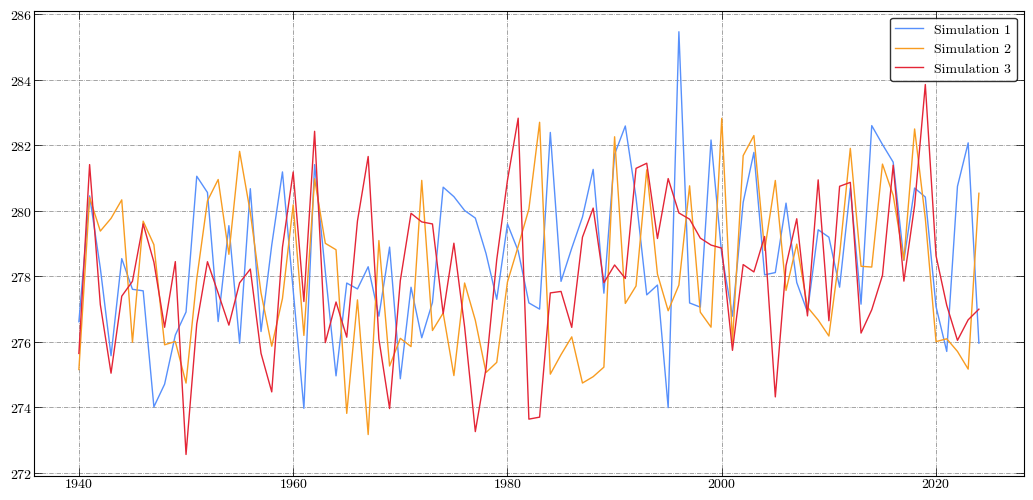

In [20]:
plt.figure(figsize=(12, 6))
for idx, sim in enumerate(sims[0:3, :]):
    sns.lineplot(x=YEARS, y=sim, alpha=1, label=f"Simulation {idx+1}")


In [21]:
sims[0, 75:85]

array([282.02246021, 281.48288167, 278.48577908, 280.69279835,
       280.41701706, 277.07254637, 275.70452009, 280.74323494,
       282.07145287, 275.95813947])

In [22]:
sims[1, 75:85]

array([281.42296512, 280.47105921, 278.49116744, 282.49552819,
       279.76606817, 276.00406106, 276.09015908, 275.70491953,
       275.16441347, 280.53238749])

In [23]:
print("Year range in data:", daily_temp.select(pl.col("temp_year")).min(), "to", daily_temp.select(pl.col("temp_year")).max())
print("\nSample counts by year:")
print(daily_temp.group_by("temp_year").agg(pl.count()).tail(5))

Year range in data: shape: (1, 1)
┌───────────┐
│ temp_year │
│ ---       │
│ i64       │
╞═══════════╡
│ 1940      │
└───────────┘ to shape: (1, 1)
┌───────────┐
│ temp_year │
│ ---       │
│ i64       │
╞═══════════╡
│ 2024      │
└───────────┘

Sample counts by year:
shape: (5, 2)
┌───────────┬───────┐
│ temp_year ┆ count │
│ ---       ┆ ---   │
│ i64       ┆ u32   │
╞═══════════╪═══════╡
│ 1956      ┆ 366   │
│ 1959      ┆ 365   │
│ 1965      ┆ 365   │
│ 1953      ┆ 365   │
│ 1944      ┆ 366   │
└───────────┴───────┘


C:\Users\Andrei\AppData\Local\Temp\ipykernel_3612\2754286623.py:3: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  print(daily_temp.group_by("temp_year").agg(pl.count()).tail(5))


<Axes: xlabel='temp_change', ylabel='Count'>

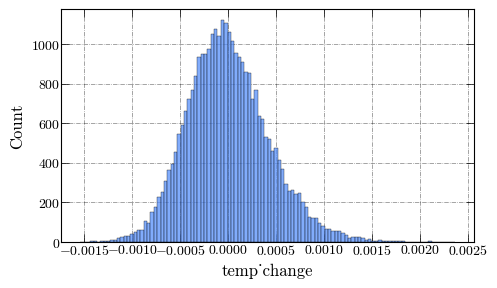

In [24]:
sns.histplot(daily_temp, x="temp_change")


Recent percentage changes statistics:
Mean: 1.1331798273607503e-06
Median: -4.2666497671611794e-05
Std: 0.00043048895138887494
Min: -0.0011198728293495156
Max: 0.002117664740248575


Text(0, 0.5, 'Frequency')

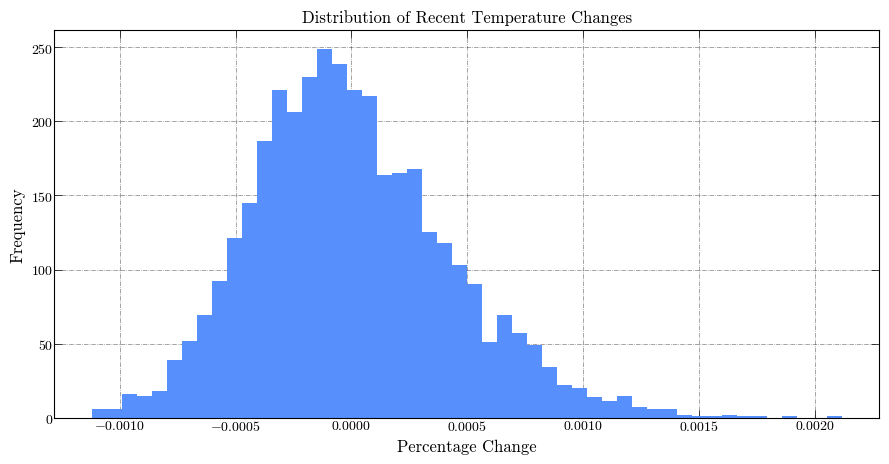

In [25]:
# Check the distribution of percentage changes for recent years
recent_changes = daily_temp.filter(pl.col("temp_year") >= 2015)["temp_change"]
print("\nRecent percentage changes statistics:")
print("Mean:", recent_changes.mean())
print("Median:", recent_changes.median())
print("Std:", recent_changes.std())
print("Min:", recent_changes.min())
print("Max:", recent_changes.max())

# Plot the distribution
plt.figure(figsize=(10, 5))
plt.hist(recent_changes, bins=50)
plt.title("Distribution of Recent Temperature Changes")
plt.xlabel("Percentage Change")
plt.ylabel("Frequency")

100%|██████████| 1000/1000 [00:39<00:00, 25.12iteration/s]


Text(0, 0.5, 'Temperature')

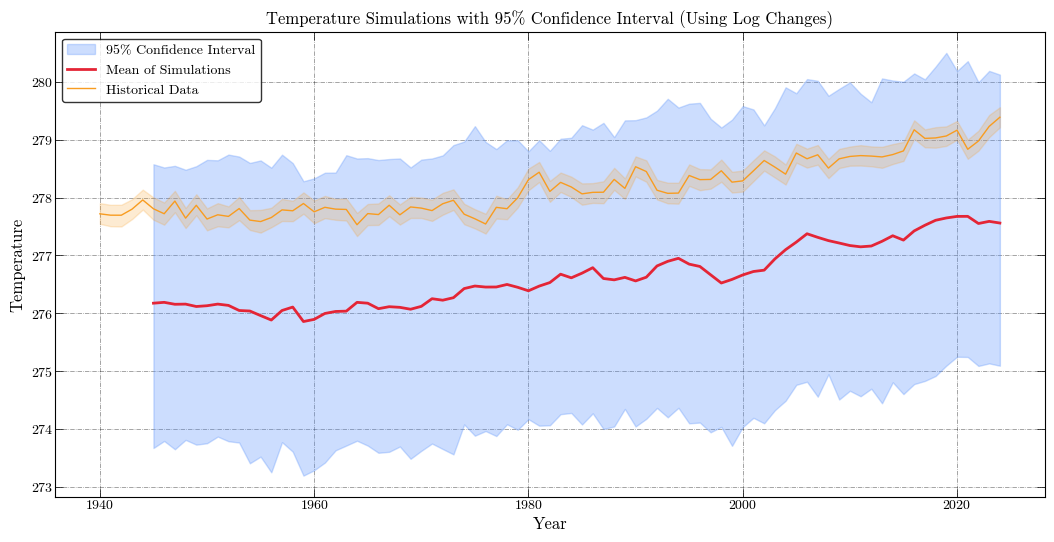

In [26]:
# Modified simulation using log returns instead of percentage changes
daily_temp = daily_temp.with_columns(
    pl.col("temp_change").map_elements(lambda x: np.log(1 + x), return_dtype=float).alias("log_change")
)

START_YEAR = 1945
sims = np.zeros((1000, 80))

for iteration in tqdm(sims, unit="iteration"):
    for year in range(80):
        current_year = START_YEAR + year
        # Get initial temperature
        initial_temp = daily_temp.filter(
            (current_year - 5 <= pl.col("temp_year")) & 
            (pl.col("temp_year") < current_year) &
            (pl.col("temp_month") == 1) &
            (pl.col("temp_day") == 1)
        )["avg_temp"].mean()
        
        # Sample log changes
        log_changes = np.random.choice(
            daily_temp.filter(
                (current_year - 5 <= pl.col("temp_year")) & 
                (pl.col("temp_year") < current_year)
            )["log_change"],
            size=365
        )
        
        # Calculate temperatures using log changes
        yearly_temps = initial_temp * np.exp(np.cumsum(log_changes))
        iteration[year] = np.mean(yearly_temps)

# Plot with confidence intervals
mean_temps = np.mean(sims, axis=0)
lower_ci = np.percentile(sims, 2.5, axis=0)
upper_ci = np.percentile(sims, 97.5, axis=0)

plt.figure(figsize=(12, 6))
years = np.arange(START_YEAR, START_YEAR + 80)
plt.fill_between(years, lower_ci, upper_ci, alpha=0.3, color='#5790fc', label='95% Confidence Interval')
plt.plot(years, mean_temps, color='#e42536', label='Mean of Simulations', linewidth=2)
sns.lineplot(data=daily_temp, x='temp_year', y='avg_temp', color='#f89c20', label='Historical Data')

plt.title('Temperature Simulations with 95% Confidence Interval (Using Log Changes)')
plt.grid(True)
plt.legend()
plt.xlabel('Year')
plt.ylabel('Temperature')